# ComboSearch Hyperparameter Analysis

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManagerGCP
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManagerGCP.get_run_names('StatArbStrategy')

,Run,RunDate,Completed,Description,Starred
0,run_0068,2018-03-07,True,"Sector 20, version 002",
1,run_0069,2018-03-08,True,"Sector 20, version 2 rerun with univ filtering",


## Import and run Model Selection

In [5]:
run = RunManagerGCP('StatArbStrategy', 'run_0069', test_periods=0)

comb = CombinationSearch(write_flag=True)
comb.add_run(run)
comb.params['training_epochs'] = 20

comb.start()

  0%|          | 0/1 [00:00<?, ?it/s]

Reading and aggregating runs...


100%|██████████| 1/1 [00:24<00:00, 24.53s/it]


Finished aggregating runs...


100%|██████████| 20/20 [03:05<00:00,  9.17s/it]


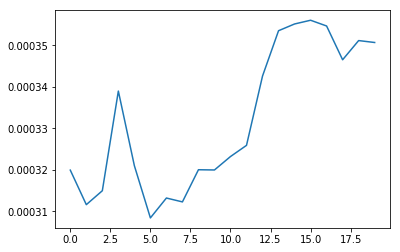

In [6]:
plt.figure()
plt.plot(comb.epoch_stats.Mean)
plt.show()

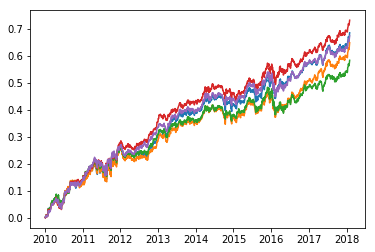

In [21]:
results = comb.best_results_rets.dropna()
plt.figure()
plt.plot(results.cumsum())
plt.show()

## Top Selection of Models

In [23]:
df = rollup_returns(results)
df['Year'] = df.sum(axis=1)

In [24]:
df

Qtr,1,2,3,4,Year
Year,,,,,
2010,0.068780,0.005522,0.055217,0.006480,0.135999
2011,0.046427,0.003442,-0.005388,0.081118,0.125598
2012,-0.016527,-0.004632,-0.001448,0.063422,0.040815
2013,0.006087,0.055025,0.022438,0.004003,0.087553
2014,0.048327,0.003841,-0.020967,-0.003909,0.027293
2015,0.013731,0.040220,-0.024305,0.068601,0.098248
2016,-0.003731,0.011156,0.005144,0.042347,0.054916
2017,0.016877,0.038463,-0.009948,0.025638,0.071030
2018,0.043970,NaN,NaN,NaN,0.043970


## Train on Sharpe

In [25]:
comb = CombinationSearch(write_flag=True)
comb.add_run(run)

comb.start(50, criteria='sharpe')

100%|██████████| 1/1 [00:00<00:00, 42.48it/s]

Reading and aggregating runs...
Finished aggregating runs...



100%|██████████| 50/50 [08:07<00:00,  9.69s/it]


In [ ]:
self.params = {
                'train_freq': 'm',
                'n_periods': 12,
                'strats_per_port': 5,
                'n_best_ports': 5,
                'seed_ind': 1234
            }